<h1 align="center">NER com spaCy em Inglês  e Português</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Neste script aprenderemos os seguintes pontos:

* Extração de informações (`Information Extraction`)

* Detecte e classifique as `Entidades Nomeadas` em Dados não-estruturados


# Usando spaCy - NER em Inglês

## Carregamos o modelo e fazemos algumas análises

In [1]:
# Carregamos o spaCy
import spacy

/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/venv_transformers/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Carregamos nosso modelo pré-treinado
# Carregamos o tokenizer em inglês, tagger, parser and NER
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_lg")

In [3]:
#text = ("When Sebastian Thrun started working on self-driving cars at "
#        "Google in 2007, few people outside of the company took him "
#        "seriously. “I can tell you very senior CEOs of major American "
#        "car companies would shake my hand and turn away because I wasn’t "
#        "worth talking to,” said Thrun, in an interview with Recode earlier "
#        "this week.")

#text = text.lower()

#text

'when sebastian thrun started working on self-driving cars at google in 2007, few people outside of the company took him seriously. “i can tell you very senior ceos of major american car companies would shake my hand and turn away because i wasn’t worth talking to,” said thrun, in an interview with recode earlier this week.'

In [3]:
# Vamos processar um documento COMPLETO, por exemplo:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")

doc = nlp(text)

In [4]:
# Analisamos a sintaxe
print("Noun phrases (frases substantivas):", [chunk.text for chunk in doc.noun_chunks])
   

Noun phrases (frases substantivas): ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']


In [5]:
# Analisamos a sintaxe
print("Verbs (Verbos):", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs (Verbos): ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']


In [6]:
# Encontre entidades, frases e conceitos nomeados
for entity in doc.ents:
    print(entity.text, entity.label_)
    

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun ORG
Recode ORG
earlier this week DATE


In [7]:
# Analisamos uma frase ou um documento pequeno
text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."
doc = nlp(text)


# Encontre entidades, frases e conceitos nomeados
for entity in doc.ents:
    print(entity.text, entity.label_)
     

Sebastian Thrun PERSON
Google ORG
2007 DATE


## Visualizando

In [8]:
# Carregamos displacy
from spacy import displacy

In [9]:
displacy.render(doc, style="ent", jupyter=True)


## Contexto de texto diferente

In [10]:
text = "Apples are good for health"
doc = nlp(text)

In [11]:
doc.ents

()

In [12]:
displacy.render(doc, style="ent", jupyter=True)

/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/venv_transformers/lib/python3.8/site-packages/spacy/displacy/__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<font color="red">Nota:</font>

O modelo `inglês` não é capaz de detectar frutas (`apples`), pois não foi treinado nessa categoria específica.

## Pipeline NER para treinamento customizado

### Preparação dos Dados

Aqui vamos a usar [spaCy NER annotation tool](http://agateteam.org/spacynerannotate/).

In [13]:
train = [
          ("An average-sized strawberry has about 200 seeds on its outer surface and are quite edible.",{"entities":[(17,27,"Fruit")]}),
          ("The outer skin of Guava is bitter tasting and thick, dark green for raw fruits and as the fruit ripens, the bitterness subsides.",{"entities":[(18,23,"Fruit")]}),
          ("Grapes are one of the most widely grown types of fruits in the world, chiefly for the making of different wines. The grape is delicious!",{"entities":[(0,6,"Fruit"),(117,122,"Fruit")]}),
          ("Watermelon is composed of 92 percent water and significant amounts of Vitamins and antioxidants.",{"entities":[(0,10,"Fruit")]}),
          ("Papaya fruits are usually cylindrical in shape and the size can go beyond 20 inches.",{"entities":[(0,6,"Fruit")]}),
          ("Mango, the King of the fruits is a drupe fruit that grows in tropical regions.",{"entities":[(0,5,"Fruit")]}),
          ("I like green grapes and black grapes a lot.",{"entities":[(13,19,"Fruit"),(30,36,"Fruit")]}),
          ("Oranges are great source of vitamin C",{"entities":[(0,7,"Fruit")]}),
          ("A apple a day keeps doctor away.",{"entities":[(2,7,"Fruit")]})
        ]
     

### Convertemos nossos Dados para o formato .spacy

In [14]:
import os
import pandas as pd
from tqdm import tqdm
from spacy.tokens import DocBin


db = DocBin() # Criamos um objeto DocBin

for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/train.spacy") # save the docbin object
     

100%|██████████| 9/9 [00:00<00:00, 1681.76it/s]


### Criamos um arquivo `config`

* [Fazemos click neste link](https://spacy.io/usage/training#quickstart)

* Preencha o formulário e baixe o arquivo de configuração

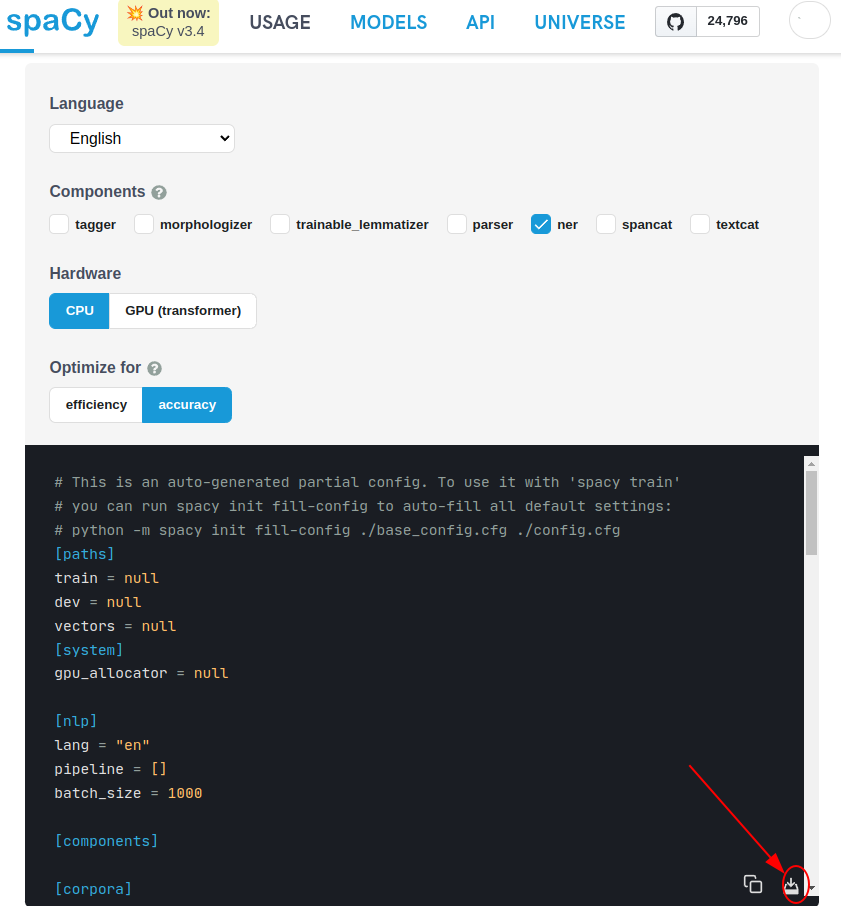

### Preenchemos a configuração restante

In [15]:
!python -m spacy init fill-config /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/base_config.cfg /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/config.cfg


✔ Auto-filled config with all values
✔ Saved config
/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


## Treinamento

In [16]:
!python -m spacy train /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/config.cfg --output /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles --paths.train /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/train.spacy --paths.dev /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/train.spacy

     

ℹ Saving to output directory:
/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-12-21 00:30:30,951] [INFO] Set up nlp object from config
[2022-12-21 00:30:30,960] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-12-21 00:30:30,964] [INFO] Created vocabulary
[2022-12-21 00:30:38,645] [INFO] Added vectors: en_core_web_lg
[2022-12-21 00:30:40,930] [INFO] Finished initializing nlp object
[2022-12-21 00:30:42,952] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     32.50   15.17    8.21  100.00    0.15
105     200          0.29    3

## Carregando nosso Modelo Treinado - Inglês

In [17]:
# Carregamos o Melhor modelo
nlp1 = spacy.load(r"/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_ingles/model-best")

In [18]:
# Vejamos um exemplo com o seguinte texto:
doc = nlp1(
            "Well, considering or labelling something delicious, totally depends on the palette and taste of a particular person."
            "Grapes are a form of a delicacy which is generally enjoyed by most people. Some people might actually like grapes and"
            "some people might not. But why not pop a handful of grapes in your mouth, without doing any labour. The best thing about"
            "eating grapes is that it makes you feel like royalty(when you directly eat the grapes from the sticks, without using your hands)."
            "Well, I consider black grapes to be more delicious than green grapes, may be because of its higher sweet content."
            "So next time , when you come across grapes, pop them in your mouth and decid for yourself whether it satisfies your delicacies or not."
          )

doc.ents

(Grapes, grapes, grapes, grapes, grapes, grapes, grapes)

In [19]:
colors = {'Fruit': "#85C1E9"}
options = {"ents": ['Fruit'], "colors": colors}

In [20]:
spacy.displacy.render(doc, style="ent", jupyter=True, options=options)
     

# Usando spaCy - NER em Português

In [21]:
# Carregamos o spaCy
import spacy

In [22]:
# Carregamos nosso modelo pré-treinado, em português

nlp = spacy.load("pt_core_news_lg") # !python -m spacy download pt_core_news_lg

In [23]:
# Vamos processar um documento COMPLETO, por exemplo:
text = ("Quando Sebastian Thrun começou a trabalhar em carros autônomos na"
        "Google em 2007, poucas pessoas fora da empresa o levaram"
        "a sério. Posso dizer que CEOs muito seniores de grandes empresas americanas"
        "as montadoras apertariam minha mão e se afastariam porque eu não estava"
        "vale a pena conversar, disse Thrun, em entrevista ao Recode anteriormente"
        "esta semana.")

doc = nlp(text)

In [24]:
# Analisamos a sintaxe
print("Noun phrases (frases substantivas):", [chunk.text for chunk in doc.noun_chunks])

Noun phrases (frases substantivas): ['Sebastian Thrun', 'carros autônomos', 'poucas pessoas', 'empresa', 'o levarama sério', 'CEOs muito seniores de grandes empresas americanasas montadoras', 'minha mão', 'eu', 'a pena', 'Thrun', ', em entrevista', 'Recode anteriormenteesta']


In [25]:
# Analisamos a sintaxe
print("Verbs (Verbos):", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs (Verbos): ['começar', 'trabalhar', 'Posso', 'dizer', 'apertar', 'afastar', 'estavavale', 'conversar', 'dizer']


In [26]:
# Encontre entidades, frases e conceitos nomeados
for entity in doc.ents:
    print(entity.text, entity.label_)
    

Sebastian Thrun PER
levarama LOC
Recode ORG


In [27]:
# Analisamos uma frase ou um documento pequeno
text = "Quando Sebastian Thrun começou a trabalhar em carros autônomos no Google em 2007, poucas pessoas fora da empresa o levaram a sério."
doc = nlp(text)


# Encontre entidades, frases e conceitos nomeados
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian Thrun PER
Google ORG


In [28]:
# Carregamos displacy
from spacy import displacy

In [29]:
displacy.render(doc, style="ent", jupyter=True)

In [30]:
train = [
        ("Um morango de tamanho médio tem cerca de 200 sementes em sua superfície externa e são bastante comestíveis.",{"entities":[(3,10,"fruta")]}),
        ("A casca externa da goiaba é de sabor amargo e espessa, verde escura para frutas cruas e, à medida que a fruta amadurece, o amargor diminui.",{"entities":[(19,25,"fruta")]}),
        ("A uva é um dos tipos de frutas mais cultivadas no mundo, principalmente para a elaboração de diversos vinhos.",{"entities":[(2,5,"fruta")]}),
        ("A melancia é composta por 92% de água e quantidades significativas de vitaminas e antioxidantes.",{"entities":[(2,10,"fruta")]}),
        ("Os frutos do mamão são geralmente de forma cilíndrica e o tamanho pode ultrapassar 20 polegadas.",{"entities":[(13,18,"fruta")]}),
        ("A manga, a rainha das frutas, é uma drupa que cresce em regiões tropicais.",{"entities":[(2,7,"fruta")]}),
        ("A laranja é uma ótima fonte de vitamina C.",{"entities":[(2,10,"fruta")]}),
        ("Uma maçã por dia mantém o médico afastado.",{"entities":[(4,8,"fruta")]}),
        ("Minhas frutas favoritas são: Morango, uva e melancia. Mas eu gosto mais de morango.",{"entities":[(29,36,"fruta"),(38,41,"fruta"),(44,52,"fruta"),(75,82,"fruta")]}),
        ("Todo final de semana vou para a feira de Jardim da Penha, aqui em Vitória. Nessa feira sempre compro laranja e morango.",{"entities":[(101,108,"fruta"),(111,118,"fruta")]})
        ]

In [31]:
import os
import pandas as pd
from tqdm import tqdm
from spacy.tokens import DocBin


db = DocBin() # Criamos um objeto DocBin

for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/train.spacy") # save the docbin object

100%|██████████| 10/10 [00:00<00:00, 1521.33it/s]


In [32]:
!python -m spacy init fill-config /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/base_config.cfg /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/config.cfg


✔ Auto-filled config with all values
✔ Saved config
/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [33]:
!python -m spacy train /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/config.cfg --output ./output_ner_portugues --paths.train /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/train.spacy --paths.dev /home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/train.spacy


ℹ Saving to output directory: output_ner_portugues
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-12-21 00:51:15,768] [INFO] Set up nlp object from config
[2022-12-21 00:51:15,778] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-12-21 00:51:15,781] [INFO] Created vocabulary
[2022-12-21 00:51:24,571] [INFO] Added vectors: pt_core_news_lg
[2022-12-21 00:51:27,938] [INFO] Finished initializing nlp object
[2022-12-21 00:51:36,453] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     37.83    0.00    0.00    0.00    0.00
100     200          0.38    434.27  100.00  100.00  100.00    1.00
200     400          0.00      0.

In [34]:
# Carregamos o Melhor modelo
nlp1 = spacy.load(r"/home/eddygiusepe/Imagens/Eddy_codigos/NLP_Transformers/Fine-tune_BERT_NER/output_ner_portugues/model-best")

In [35]:
# Vejamos um exemplo com o seguinte texto:
doc = nlp1("As minhas frutas favoritas são morango e melancia, mas também gosto de uva e laranja.")

doc.ents

(morango, melancia, uva, laranja)

In [36]:
colors = {'fruta': "#85C1E9"}
options = {"ents": ['fruta'], "colors": colors}

In [37]:
spacy.displacy.render(doc, style="ent", jupyter=True, options=options)

In [38]:
doc1 = nlp1("A fruta que mais como na feira de Vitória é a uva.")
doc1.ents

(uva,)

In [39]:
spacy.displacy.render(doc1, style="ent", jupyter=True, options=options)